In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import sympy as sp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [0]:
(X_train, Y_train),(x_test, y_test)= datasets.cifar10.load_data()
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

spilt分割成兩筆訓練資料，用作遷移學習

In [0]:
x_train, x, y_train, y = train_test_split(X_train, Y_train, test_size = 0.2, random_state=40)

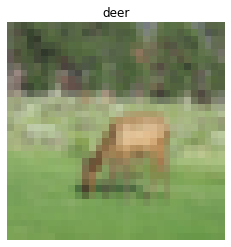

In [14]:
idx = np.random.randint(X_train.shape[0])
x_sample = X_train[idx]
y_sample = Y_train[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [19]:
print("x_train:", X_train.shape)
print("x_test:", x_test.shape)
print("y_train:", Y_train.shape)
print("y_test:", y_test.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


In [0]:
#建立模型
cnn_layers = [Conv2D(32,(3,3), padding='same', input_shape=(32,32,3), activation='relu'),
             MaxPooling2D(),
             Conv2D(64,(3,3), padding='same', activation='relu'),
             MaxPooling2D(),
             Conv2D(128, (3,3), padding='same', activation='relu'),
             MaxPooling2D(),
             Conv2D(256, (3,3), padding='same', activation='relu'),
             MaxPooling2D(),
             Flatten()]

In [0]:
FC_layers = [Dense(60,activation='relu'),
            Dense(20,activation='softmax')]

In [27]:
model = Sequential(cnn_layers+FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)         2

In [28]:
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.087),metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=256, epochs=3)

Epoch 1/3
157/157 [==============================] - 114s 723ms/step - loss: 10.0152 - accuracy: 0.1146
Epoch 2/3
157/157 [==============================] - 116s 738ms/step - loss: 10.0150 - accuracy: 0.1059
Epoch 3/3
157/157 [==============================] - 114s 729ms/step - loss: 10.0150 - accuracy: 0.1003


In [0]:
#定義新的 FC_layers 
FC_layers2 = [Dense(60,activation='sigmoid'),  
              Dense(30,activation='relu'),
              Dense(20,activation='softmax')]

In [30]:
#舊的 cnn_layer 配到新的 FC_layers
model2 = Sequential(cnn_layers+FC_layers2) 
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x, y, batch_size=256, epochs=3, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 256)        